<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/kalman-filters/rlabbe/rlabbe_08_designing_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install filterpy

In [2]:
import math

import numpy as np

from scipy.linalg import block_diag

from matplotlib.pyplot import plot
from matplotlib import pyplot as plt

from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

In [3]:
def data_and_noise_2d(x0 = 0, y0 = 0, v_x = 1, v_y = 1, a_x = 0, a_y = 0, var = 1, count = 3, seed = 123):
  np.random.seed(seed)

  std = math.sqrt(var)
  xs = np.array([(x0 + t * v_x + 0.5 * a_x * t ** 2) for t in range(count)])
  ys = np.array([(y0 + t * v_y + 0.5 * a_y * t ** 2) for t in range(count)])

  offset_y = np.array([0 if t < count/2 else 4 for t in range(count)])
  print('offset_y\n', offset_y)
  ys = np.add(ys, offset_y)

  x_noise = np.array(np.random.normal(0, std, count))
  y_noise = np.array(np.random.normal(0, std, count))

  actuals = np.vstack((xs, ys)).T
  measurements = np.vstack((xs+x_noise, ys+y_noise)).T
  return (actuals, measurements)

In [4]:
actuals, measurements = data_and_noise_2d(x0=20, y0=10, var=0.2, count=30)

dt = 1
kf = KalmanFilter(dim_x=4, dim_z=2)

# state transition function
kf.F = np.array([[1, dt, 0, 0],
                 [0,  1, 0, 0],
                 [0,  0, 1, dt],
                 [0,  0, 0, 1],
                 ])

# Process noise
q = Q_discrete_white_noise(dim=2, dt=dt, var=0.001)
kf.Q = block_diag(q, q)

# measurement matrix state -> measurement space
kf.H = np.array([[1,0,0,0],
                 [0,0,1,0]])

# initial state
kf.x = np.array([[0, 0, 0, 0]]).T

# initial covariance matrix - weak flat prior
kf.P = np.eye(4) * 500.

# Measurement noise
kf.R = np.eye(2).dot(8.)

print('kf\n', kf)

results = kf.batch_filter(measurements)
means = results[0]

offset_y
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
kf
 KalmanFilter object
dim_x = 4
dim_z = 2
dim_u = 0
x = [[0 0 0 0]].T
P = [[500.   0.   0.   0.]
     [  0. 500.   0.   0.]
     [  0.   0. 500.   0.]
     [  0.   0.   0. 500.]]
x_prior = [[0. 0. 0. 0.]].T
P_prior = [[1. 0. 0. 0.]
           [0. 1. 0. 0.]
           [0. 0. 1. 0.]
           [0. 0. 0. 1.]]
x_post = [[0. 0. 0. 0.]].T
P_post = [[1. 0. 0. 0.]
          [0. 1. 0. 0.]
          [0. 0. 1. 0.]
          [0. 0. 0. 1.]]
F = [[1 1 0 0]
     [0 1 0 0]
     [0 0 1 1]
     [0 0 0 1]]
Q = [[0.00025 0.0005  0.      0.     ]
     [0.0005  0.001   0.      0.     ]
     [0.      0.      0.00025 0.0005 ]
     [0.      0.      0.0005  0.001  ]]
R = [[8. 0.]
     [0. 8.]]
H = [[1 0 0 0]
     [0 0 1 0]]
K = [[0. 0.]
     [0. 0.]
     [0. 0.]
     [0. 0.]]
y = [[0. 0.]].T
S = [[0. 0.]
     [0. 0.]]
SI = [[0. 0.]
      [0. 0.]]
M = [[0. 0.]
     [0. 0.]]
B = None
z = [[None None]].T
log-likelihood = -708.3964185322641
l

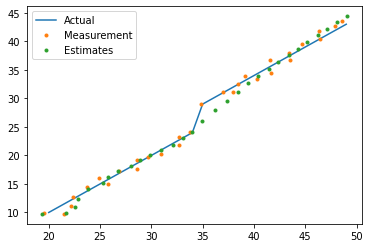

In [5]:
plot(actuals[:,0], actuals[:, 1], label='Actual')
plot(measurements[:,0], measurements[:,1], '.', label='Measurement')
plot(means[:,0], means[:,2], '.', label='Estimates')
plt.legend()
plt.show()